# Gaussian Processes

## To add: 
1. Relation to reproducing kernel hilbert space (RKHS)
2. Better explain function space and difference to parameter space
3. Write code/apply to image data? 
4. Write code/apply to other applications / data? 

A stochastic process is a class of mathematical objects used to define a class of random variables. Such processes can be utilised to model systems that evolve with a degree of randomness over time or space. The growth of a bacterial population or electrical current are an example of stochastic processes. Stochastic processes can be taxonomified into different classes including Brownian motion, random walks, Markov processes and **Gaussian processes**. 

Gaussian processes are a method find a distribution over all possible *functions* which are consistent with observed data. A key distinction is between Bayesian Regression and Gaussian Processses, is that where Bayesian Regression places a distrbution over defined parameters i.e. $\beta_0$, $\beta_1$ etc. Gaussian Processes place the distrbution over of a *function space*, the output space of function itself.
More rigorously:

*Bayesian Regression*:

$\quad$ x $\rightarrow$ f(x) $\rightarrow$ $\hat{y}$

where f(x) = $\beta_0 + \beta_0 x_1 + ...$

*Gaussian Processes*:
$\quad$ x $\rightarrow$ f(x) $\rightarrow$ $\hat{y}$

where f(x)  $v \subseteq \mathbb{R}^n$ and 

Initially, the prior is set over candidate functions which is updated as data is observed. 
From this update a posterior is calculated over the candidate functions. Gaussian processes provide a flexible, non-parameteric method for interpolation.

Gaussian processes provide a non-linear method to calculate both a posterior mean and the relative uncertainty bounds for a range of x's. 


Definition of a Gaussian process; a Stochastic process whereby if a set of the variables are marginalised the resulting subset of variables are also Gaussian.

#### Distinctions: 
   - *Noiseless* - measurement uncertainty at all observed data points constrained to be zero. 
   - *Noise* - measurement uncertainty at data points can depart from zero. 

Gaussian process provide a solution to the exploitation exploration trade-off, which is known as Bayesian Optimisation and provides a method to efficiently search a *non-differentiable* numerical space.

Gaussian processes are completely defined by their second order statistics i.e. covariance matrix since due to their zero mean.

Distribution over all possible functions, starting with a GP prior, of zero-mean and some variance

Gaussian processes are a probabilistic method resulting in different results every time the model is calculated.
Note: once realisation of data is observed then the model becomes deterministic in its output.

Gaussian process with mean function m(·) and covariance function k(·, ·) if for any finite
set of elements x1, . . . , xm ∈ X , 


$
\begin{equation}
\begin{pmatrix}
    f(x_1) \\
    \vdots   \\
    f(x_m) \\
\end{pmatrix}
\sim
N(\begin{pmatrix}
    m(x_1) \\
    \vdots   \\
    m(x_m) \\
\end{pmatrix},
\begin{pmatrix}
    k(x_1,x_1) & \cdots & k(x_1,x_m)  \\
    \vdots  & \ddots & \vdots \\
    k(x_m,x_1) & \cdots & k(x_m x_m )\\
\end{pmatrix}
)
\end{equation}
$




### **Using Gaussian Processes**
Define a Gaussian prior which is sampled from
Forms a Gaussian posterior distribution which is then also sampled from.

Gaussian prior - assumes an infinite dimensional Gaussian in which the subset of dimensions is also Gaussian. 

To sample from the prior distribution two constructions are needed, a mean and the variance matrix.
Variance matrix in this case is a kernel construction of where on diagonal entries are the variation of the points and off diagonal entries are respective covariance both of which are defined by the the kernel function. 


### **Kernels**
At the heart of Guassian Processes is the kernel, a flexible symmetric function that measures the similarity/covariance of two data points **|x -x'|**. Calculating a measure of similarity can is dependent on both the form of the **kernel function** and **bandwith** parameter of the kernel. Numerous **kernel functions** exist, a large range can be found [here](https://en.wikipedia.org/wiki/Kernel_(statistics)), however in practice Gaussian Processes utilise the Radial Basis (squared error) kernel: 

$$
    K(x,x') = exp(- \gamma |x-x'|^2) 
$$

where $  \gamma $ is the bandwidth parameter which controls the magnitude of smoothing.

As previously, the role of a kernel is to measure similarity between two points, thus we can explicitly say that two data points directly next to one another should have very similar values for $ K(x,x') $
Requires kernel (using squared error) to measure the similarity between two input data points. A range of functions exists that can be used as kernel functions as long as the return a similarity metric between two data points.

Kernels can undergo both multiplication and addition to form more complex kernels with desired characteristics. 
I.e. *Radial basis kernels* allow a linear trend to be modelled, whereas Exponential-Sinusoid kernel allows for periodic characteristics.

An important dichotomy explaining kernels is the difference between **stationary** and **non-stationary** kernels. 
Stationary kernels, such as the RBF kernel or the periodic kernel, are functions invariant to translations, and the covariance of two points is only dependent on their relative position. Non-stationary kernels, such as the linear kernel, do not have this constraint and depend on an absolute location [3].

### Mathematical definition
A stochastic process is said to be a Gaussian process over $\{X_t; t \in T\}$ if and only if for every finite set of parameters $ t_1, t_2, ... t_k$ such that $ \textbf{X}_{t_1,..,t_k} = (X_{t_1}, X_{t_2}, ..., X_{t_k}) $ is a **multivariate Gaussian**.

### **Gaussian Process regression**
Gaussian Processes are a compact method to construct a posterior predictive distribution for regression based tasks. GPs are nonlinear regression approaches and extend the ideas of predictive distributions for regressional tasks, process: 

$$ 
y_i = f(x_i) + \epsilon_i, \space i = 1, ..., m
$$

where the predictive distribution is derived as:

$$ 
P(y'| x', Y,X) = \int P(y'|f, x')P(f|x,Y) df
$$

is said to be drawn from a
Gaussian process with mean function m(·) and covariance function k(·, ·) if for any finite
set of elements x1, . . . , xm ∈ X , 


#### Modelling non-stationary processes with GPs
The decision which kernel to use is highly dependent on prior knowledge about the data, e.g. if certain characteristics are expected. Examples for this would be stationary nature, or global trends and patterns. Further, kernel can be multiplied together as long as the kernel properties are not violated (semi-positive definite and symmetric). 

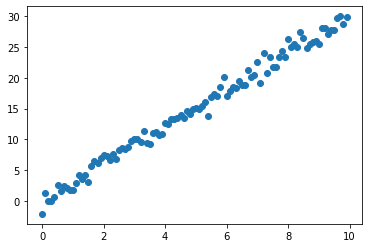

In [10]:
# import base libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
# import libraries for GP component
from sklearn.gaussian_process import GaussianProcessRegressor
import sklearn.gaussian_process.kernels as k
%matplotlib inline

# create linear trend
x = range(100)
x = [i/10 for i in x]

y_white = np.random.normal(0,1,len(x))
y_trend = [3 * i for i in x]
y = y_trend + y_white

plt.scatter(x,y)

In [20]:
# do Gaussian process regression
kernel = k.DotProduct(sigma_0 = 0)
gp = GaussianProcessRegressor(kernel=kernel).fit(np.atleast_2d(x).T,y)


y_mean, y_std = gp.predict([x], return_std=True)
plt.scatter(x,y, zorder=20)
plt.plot(x, y_trend)
plt.fill_between(x, y_mean + 2 * y_std, y_mean - 2 * y_std, alpha=0.2)
plt.show()


/Users/jacklee-kopij/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:271: RuntimeWarning: divide by zero encountered in log
  return np.log(np.hstack(theta))
/Users/jacklee-kopij/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


ValueError: shapes (1,100) and (1,100) not aligned: 100 (dim 1) != 1 (dim 0)

In [18]:
print(y_std)

[1.98504498e-06 1.95534806e-06 1.92571206e-06 1.89602272e-06
 1.86687228e-06 1.83774276e-06 1.80857377e-06 1.77998721e-06
 1.75118761e-06 1.72287326e-06 1.69500299e-06 1.66693317e-06
 1.63926319e-06 1.61166926e-06 1.58555637e-06 1.55786634e-06
 1.53185097e-06 1.50538608e-06 1.47964854e-06 1.45452432e-06
 1.42957985e-06 1.40514079e-06 1.38123396e-06 1.35756039e-06
 1.33346661e-06 1.31096348e-06 1.28841199e-06 1.26580957e-06
 1.24600798e-06 1.22733475e-06 1.20542934e-06 1.18910893e-06
 1.16952758e-06 1.15192819e-06 1.13327225e-06 1.11828226e-06
 1.10469776e-06 1.09012968e-06 1.07948603e-06 1.06790500e-06
 1.05451381e-06 1.04605727e-06 1.03410194e-06 1.02893570e-06
 1.01677907e-06 1.01152436e-06 1.00800601e-06 1.00624222e-06
 1.00093219e-06 9.99155916e-07 1.00270533e-06 1.00093219e-06
 1.00800601e-06 1.00800601e-06 1.00800601e-06 1.02026717e-06
 1.02893570e-06 1.03238273e-06 1.04605727e-06 1.05619700e-06
 1.05955534e-06 1.07618988e-06 1.08604831e-06 1.10871048e-06
 1.11510080e-06 1.134055

### Gaussian processes - Model Predictive Control
Reiterating, machine learning deals with average scenario, control deals with the worst case scenarios - Neil Lawrence. 
Gaussian processes are a method to provide risk aware optimal control.
*Problem formulation:* 
A dynamical system can be represented by the following discrete-time model: \\
$$
x(k+1) = f(x(k), u(k)) + B_d(g(x(k), u(k)) _ \omega(k))
$$

Where $x(k) \in \mathbb{R}^n_x$ is the *system space* and $u(k) \in \mathbb{R}^n_k$ are the *control inputs* at time k. The system is defined as *nominal* components, $f(\dot)$ and *additive dynamics*; $g(\dot)$ which are initiall unknown dynamics but are to be learned through data. $\omega_k \sim \mathcal{N}(0,\sigma^\omega)$, where $\sigma^\omega = diag([\sigma_1^2, ... \sigma_{n_d}^2])$ is diagonal variance matrix. 

For GP Model Predictive Control probabilistic satisfaction constraints are set such that: 
$$
Pr( X(k) \gt \chi ) = p_x\\
Pr( U(k) \gt \upsilon ) = p_u
$$

where $\chi \subset \mathbb{R}^n_x$ and $\upsilon \subset \mathbb{R}^n_u$ and $p_x, p_u$ are the respective constraint satisfaction probabilities.


### Extensions: 
    Bayesian Optimisation
        Efficiently searching a space.
    


### Todo: 
Explore linear alg section at the end of Nando de's lecture. 
Build on Nando's code
Explain more intution around distribution of functions. 
Extend to 2d space

## References
[Gaussian processes for Model Predictive Control](https://arxiv.org/pdf/1705.10702.pdf)

[Gaussian processes non-stationary modelling through kernel, "Combining different kernels" section](https://distill.pub/2019/visual-exploration-gaussian-processes/)

[3] [A visual explanation of GPs, focusing on kernels. Explains stationary vs non-stationary kernels](https://distill.pub/2019/visual-exploration-gaussian-processes/)

### Kernels in Python

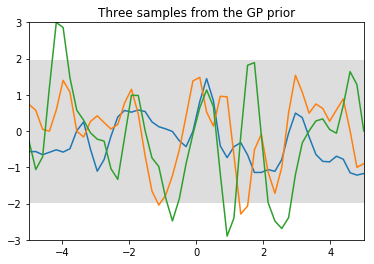

In [58]:
import numpy as np
import matplotlib.pyplot as pl
% matplotlib inline

# Test data
n = 50
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

# Define the kernel function
def kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)

param = 0.1
K_ss = kernel(Xtest, Xtest, param)

# Get cholesky decomposition (square root) of the
# covariance matrix
L = np.linalg.cholesky(K_ss + 1e-15*np.eye(n))
# Sample 3 sets of standard normals for our test points,
# multiply them by the square root of the covariance matrix
f_prior = np.dot(L, np.random.normal(size=(n,3)))

# Now let's plot the 3 sampled functions.
pl.plot(Xtest, f_prior)
pl.axis([-5, 5, -3, 3])
# Draw 95% confidence intervals
pl.gca().fill_between(Xtest.flat, -1.96, 1.96, color="#dddddd")
pl.title('Three samples from the GP prior')
pl.show()

Text(0.5,1,'Three samples from the GP posterior')

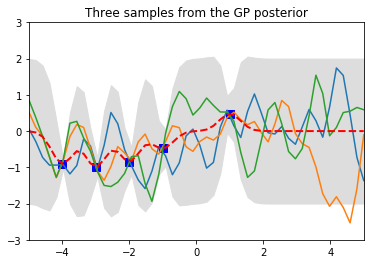

In [50]:
# Noiseless training data
Xtrain = np.array([-4, -3, -2, -1, 1, 9]).reshape(6,1)
ytrain = np.sin(0.5 * Xtrain)

# Apply the kernel function to our training points
K = kernel(Xtrain, Xtrain, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(Xtrain)))

# Compute the mean at our test points.
K_s = kernel(Xtrain, Xtest, param)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain)).reshape((n,))

# Compute the standard deviation so we can plot it
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)
# Draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3)))

pl.plot(Xtrain, ytrain, 'bs', ms=8)
pl.plot(Xtest, f_post)
pl.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP posterior')